#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

#### Import our modules,
* age_predict is a python package we created for this project.
* to install it, in a terminal go to the age_predict folder and type: pip install .

In [2]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [3]:
import os
# View working directory
os.getcwd()
#os.chdir(')

'/Users/dcox/Desktop/EWAS-organized/blood/feature_selection'

#### Set paths

In [4]:
# Paths
path_to_data = '../../data/age_methylation_v1/'

#### Set tissue of interest

In [5]:
tissue_of_interest = 'whole blood'

#### Load data

In [6]:
%%time
# The data file is processed one row at a time and the rows corresponding to 
# the tissue of interest are saved. This involves writing to a new csv file just 
# data from the tissue of interest and then reading it back in. All of this is done 
# with the function "load_EWAS_aging_by_tissue()" which uses the csv module.
# Reading it directly with Pandas is far to slow.

file_in = path_to_data + 'age_methylation_v1.txt'
file_out = path_to_data + tissue_of_interest + '_age_methylation_v1.txt'

df_t = le.load_EWAS_aging_by_tissue(file_in, file_out, search_term=tissue_of_interest,
                          num_rows='all', verbose=True)

finished line 10000
finished line 20000
finished line 30000
finished line 40000
finished line 50000
finished line 60000
finished line 70000
finished line 80000
finished line 90000
finished line 100000
finished line 110000
finished line 120000
finished line 130000
finished line 140000
finished line 150000
finished line 160000
finished line 170000
finished line 180000
finished line 190000
finished line 200000
finished line 210000
finished line 220000
finished line 230000
finished line 240000
finished line 250000
finished line 260000
finished line 270000
finished line 280000
finished line 290000
finished line 300000
finished line 310000
finished line 320000
finished line 330000
finished line 340000
finished line 350000
finished line 360000
finished line 370000
finished line 380000
finished line 390000
finished line 400000
finished line 410000
finished line 420000
finished line 430000
finished line 440000
finished line 450000
finished line 460000
finished line 470000
finished line 480000



#### Select age 20 and older

In [7]:
df_t_over20 = df_t[df_t.age >=20]

#### Split and impute data
* Drop row with more than 10% NaN
* Impute with means of train columns
* Split 75/25

In [8]:
%%time
df_train, df_test = le.splitting_and_imputing(df_t_over20, input_percent=10, 
                                           fraction_test=0.25, seed=2021)

CPU times: user 3min 52s, sys: 40.2 s, total: 4min 32s
Wall time: 4min 49s


In [9]:
df_train

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,...,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM2334366,whole blood,94,0.078,0.205,0.139,0.904,0.120,0.970,0.912,0.276,...,0.109,0.016,0.003,0.006000,0.010000,0.004,0.010,0.001000,0.047,0.012
GSM989863,whole blood,101,0.013,0.008,0.117,0.756,0.033,0.958,0.933,0.324,...,0.152,0.015,0.005,0.008000,0.009000,0.002,0.009,0.001000,0.057,0.008
GSM1443696,whole blood,99,0.013,0.017,0.477,0.715,0.017,0.966,0.932,0.010,...,0.122,0.005,0.006,0.011000,0.027000,0.000,0.003,0.002000,0.033,0.003
GSM1069241,whole blood,99,0.013,0.017,0.477,0.715,0.017,0.966,0.932,0.010,...,0.122,0.005,0.006,0.011000,0.027000,0.000,0.003,0.002000,0.033,0.003
GSM1572442,whole blood,112,0.036,0.255,0.260,0.690,0.065,0.983,0.951,0.341,...,0.138,0.011,0.004,0.012000,0.037000,0.002,0.006,0.007000,0.036,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1498536,whole blood,48,0.010,0.048,0.068,0.575,0.034,0.981,0.946,0.352,...,0.155,0.028,0.007,0.019000,0.018202,0.002,0.011,0.003000,0.052,0.016
GSM1868331,whole blood,48,0.024,0.019,0.635,0.848,0.035,0.958,0.944,0.005,...,0.127,0.009,0.004,0.001000,0.011000,0.004,0.005,0.000000,0.036,0.097
GSM2337452,whole blood,48,0.027,0.032,0.145,0.661,0.068,0.964,0.936,0.388,...,0.133,0.016,0.028,0.008000,0.017000,0.003,0.009,0.002000,0.054,0.107
GSM1653326,whole blood,48,0.033,0.023,0.529,0.772,0.064,0.956,0.946,0.000,...,0.089,0.001,0.009,0.008616,0.018202,0.000,0.003,0.002595,0.034,0.076


In [10]:
df_test

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,...,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM1345728,whole blood,38,0.020,0.037,0.100,0.529,0.025,0.975,0.924,0.400,...,0.12600,0.015,0.001,0.009,0.010,0.007,0.012,0.003,0.041,0.009
GSM1425726,whole blood,79,0.042,0.039,0.647,0.854,0.067,0.968,0.934,0.009,...,0.13377,0.008,0.002,0.007,0.007,0.002,0.006,0.000,0.023,0.006
GSM1886430,whole blood,24,0.022,0.021,0.501,0.676,0.032,0.966,0.939,0.001,...,0.20100,0.009,0.007,0.009,0.011,0.004,0.010,0.003,0.057,0.004
GSM2337042,whole blood,25,0.016,0.030,0.120,0.534,0.028,0.974,0.924,0.308,...,0.09600,0.026,0.002,0.008,0.016,0.004,0.020,0.002,0.065,0.008
GSM1886440,whole blood,23,0.013,0.011,0.607,0.862,0.090,0.957,0.871,0.000,...,0.18100,0.027,0.013,0.010,0.048,0.001,0.005,0.003,0.039,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990569,whole blood,85,0.030,0.031,0.692,0.841,0.031,0.954,0.916,0.008,...,0.13900,0.016,0.007,0.014,0.009,0.003,0.011,0.002,0.039,0.112
GSM1345649,whole blood,49,0.036,0.029,0.599,0.706,0.036,0.958,0.929,0.001,...,0.13000,0.014,0.004,0.004,0.010,0.002,0.005,0.001,0.034,0.003
GSM2334025,whole blood,26,0.032,0.034,0.169,0.577,0.047,0.989,0.935,0.415,...,0.16000,0.018,0.008,0.007,0.020,0.002,0.011,0.002,0.047,0.007
GSM989849,whole blood,93,0.059,0.051,0.670,0.775,0.066,0.961,0.932,0.014,...,0.13500,0.026,0.006,0.008,0.005,0.007,0.011,0.001,0.046,0.120


#### Run XGboost 50 times to identify most importance cpgs by importance score
The following hyperparameters were used (identified as ~ optimal by cv)
* n_estimators=200
* n_estimators=200,
* min_child_weight=1,
* max_depth=3,
* subsample=0.7,
* colsample_bytree=0.5,
* learning_rate=0.1)

In [11]:
%%time
# Running XGboost on Train dataset 50 times with 50 different train/val splits, all cpgs
# This can take hours 
df_importance, rms_train, rms_test, r2_train, r2_test = rg.repeat_XGBoost(df_train, 50, test_size=0.20)

1 r^2 validation = 0.9200325133067255
2 r^2 validation = 0.9323342835584669
3 r^2 validation = 0.9324124146965669
4 r^2 validation = 0.9344225460073718
5 r^2 validation = 0.9267443446611138
6 r^2 validation = 0.9242815733245143
7 r^2 validation = 0.9191948411767128
8 r^2 validation = 0.92654621604035
9 r^2 validation = 0.9366557997462612
10 r^2 validation = 0.9151161659169605
11 r^2 validation = 0.93399899501114
12 r^2 validation = 0.9154187827864512
13 r^2 validation = 0.9276929444717277
14 r^2 validation = 0.9498004505412017
15 r^2 validation = 0.9233638990970506
16 r^2 validation = 0.8843866902578942
17 r^2 validation = 0.912797104831239
18 r^2 validation = 0.9168924105397632
19 r^2 validation = 0.917789592485682
20 r^2 validation = 0.8969440880359779
21 r^2 validation = 0.9124023165260071
22 r^2 validation = 0.9087158966544215
23 r^2 validation = 0.928858380198591
24 r^2 validation = 0.9123477913847878
25 r^2 validation = 0.9205931334572728
26 r^2 validation = 0.9111172841474791
27

#### Write the importance score from the 50 trials results to a file

In [12]:
file = 'df_importance_EWAS_age_' + tissue_of_interest + '_50_trials.csv'
df_importance.to_csv(file)
# df_importance = pd.read_csv('./blood/df_importance_EWAS_age_whole_blood_50_trials.csv' , index_col=0)

#### Finding cpgs with on average the highest importance scores
* see mean column in the df below.

In [13]:
df_imp_sorted = rg.importances_sorted_by_mean(df_importance)

#### Make a histogram of the frequency of cgs in the top 100 importance score in the 50 trials

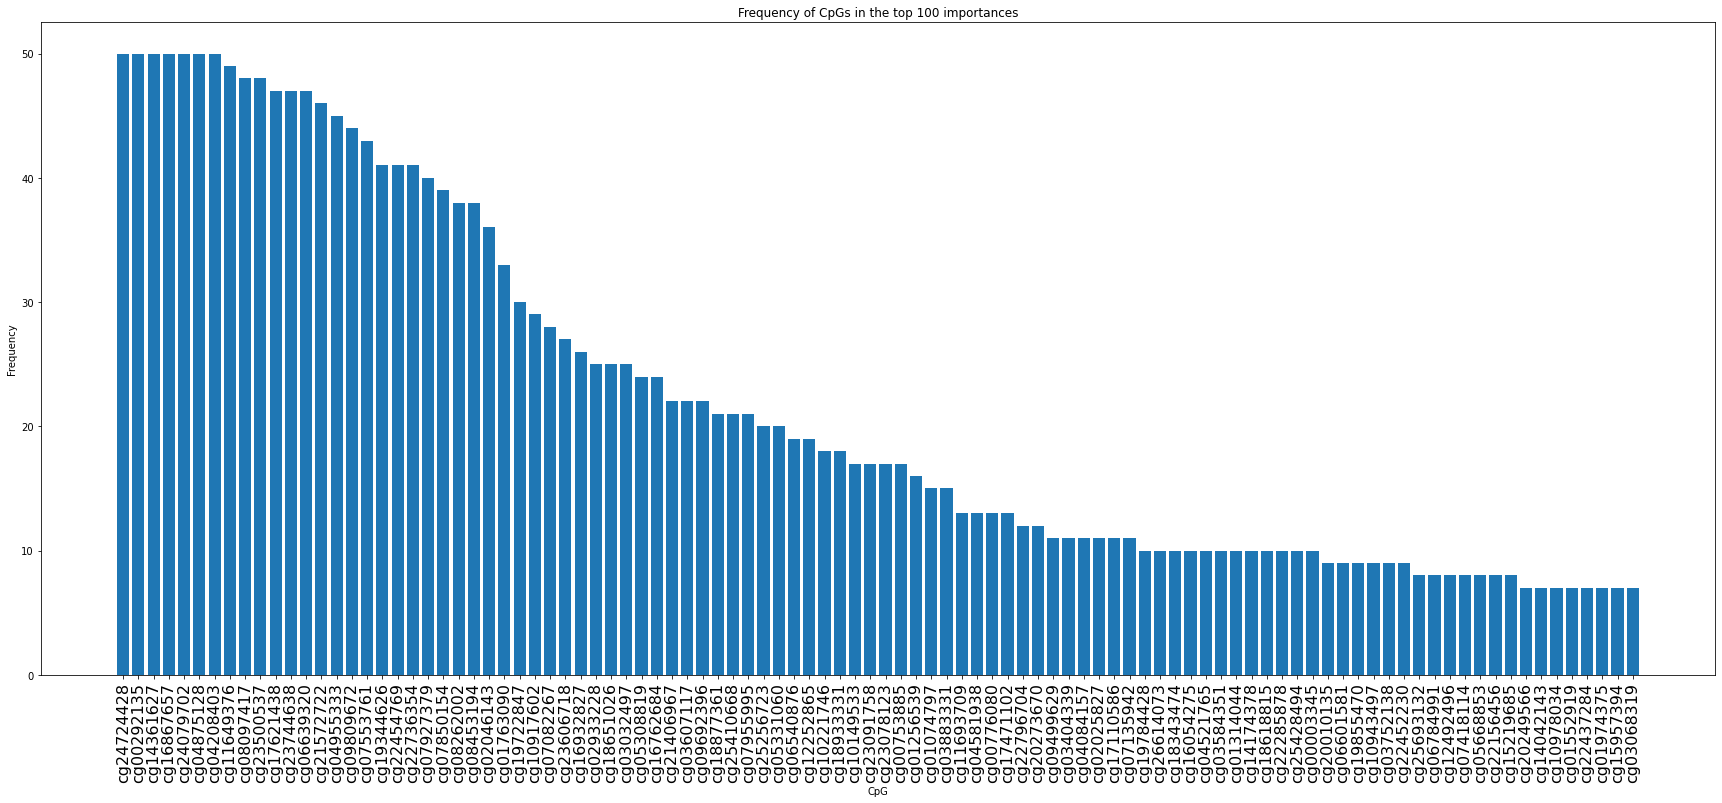

In [15]:

indices, cpgs_per_trial, hist = rg.histogram_of_top_CpGs_by_importance(df_importance, 100)

In [ ]:
cpgs_XGboost_ranked_blood = hist.index.values

# Modeling with 100 random cpgs blood data

### Conclusions
* Blood data
* Randomly choose 100 cpgs and use for linear regression
* 1000 trials (same sample split, different cpgs)
* mean rMSE on test data is 14.84 ± 1.14
* rMSE with top100 from XGboost = 5.80
* Figures show difference, plots histograms.
* XGboost method far superior


## Modeling with random 100 cpgs

In [84]:
# randomly select 100 cpgs and use to model, save scores, do 1000 times
num_trials = 1000
cpgs_in_trials = []
rms_trains = []
rms_tests = []
r2_trains = []
r2_tests = []
y = df_p_working.age
for i in range(num_trials):
    cpgs = random.choices(df_p_working.columns[2:], k=100)
    cpgs_in_trials.append(cpgs)
    X = df_p_working[Top100_cpgs_XGboost]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021)
    mod_100, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, y_train, X_test, y_test, plot=False)
    rms_trains.append(rms_train)
    rms_tests.append(rms_test)
    r2_trains.append(r2_train)
    r2_trains.append(r2_test)

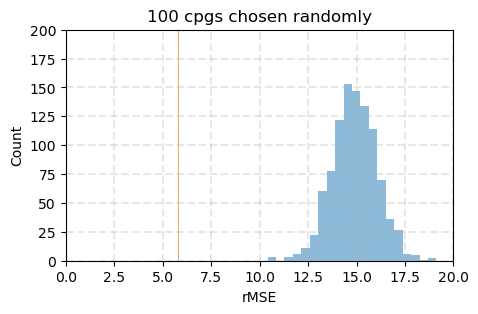

In [83]:
# Make histogram of scores
plt.figure(figsize=(5,3))
plt.hist(rms_tests, bins=20, alpha = 0.5)
plt.hist(rms_tests_XG, bins=20, alpha = 0.7)
plt.xlabel('rMSE')
plt.ylabel('Count')
plt.ylim(0,200)
plt.xlim(0,20)
plt.title('100 cpgs chosen randomly')
plt.grid(True, lw=1.5, ls='--', alpha=0.3)
plt.show()

In [52]:
Top100_cpgs_XGboost = h.index[:100].values
plt.rcdefaults()

In [6]:
from sklearn.model_selection import train_test_split
X = df_p_working[Top100_cpgs_XGboost]
y = df_p_working.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021)

## Modeling with top100 cpgs by XGboost cross-validation

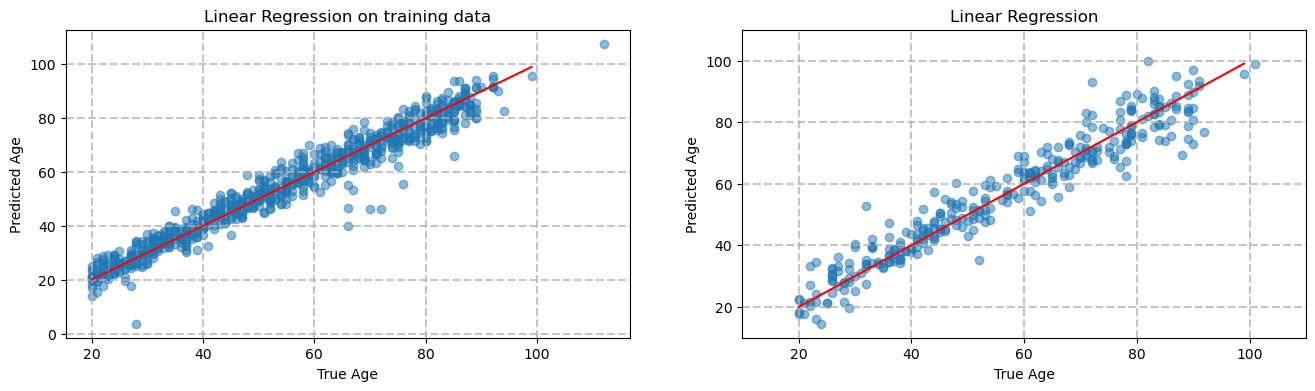

In [74]:
plt.rcdefaults()
mod_100, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, y_train, X_test, y_test, plot=True)

## Modeling with randomly chosen 100 cpgs

In [91]:
from sklearn.model_selection import train_test_split
X = df_p_working[cpgs_in_trials[0]]
y = df_p_working.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021)

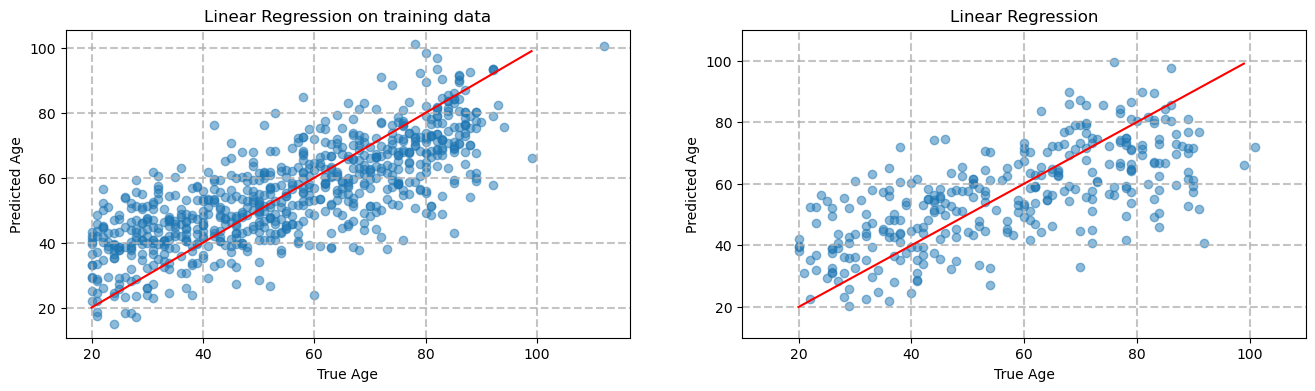

In [86]:
plt.rcdefaults()
mod_100, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, y_train, X_test, y_test, plot=True)

In [87]:
from sklearn.model_selection import train_test_split
X = df_p_working[cpgs_in_trials[1]]
y = df_p_working.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021)

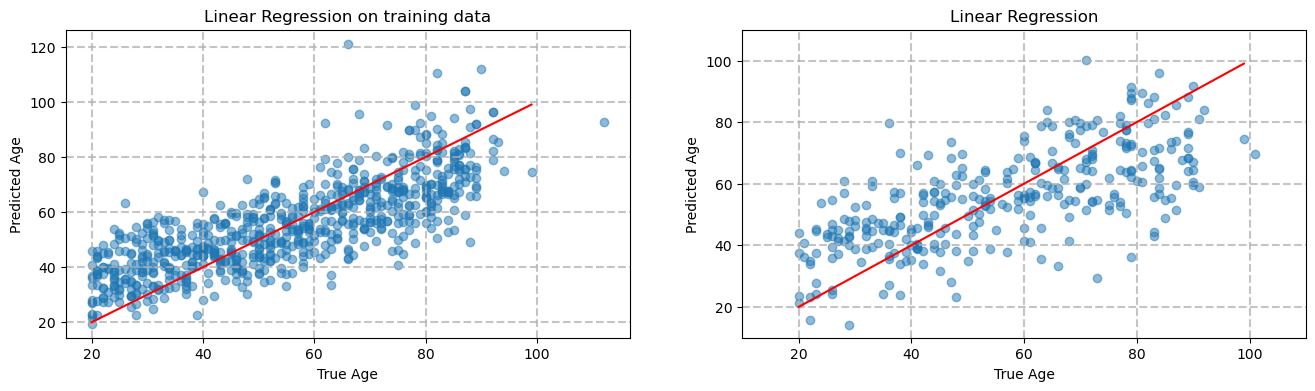

In [88]:
plt.rcdefaults()
mod_100, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, y_train, X_test, y_test, plot=True)

In [89]:
from sklearn.model_selection import train_test_split
X = df_p_working[cpgs_in_trials[2]]
y = df_p_working.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021)

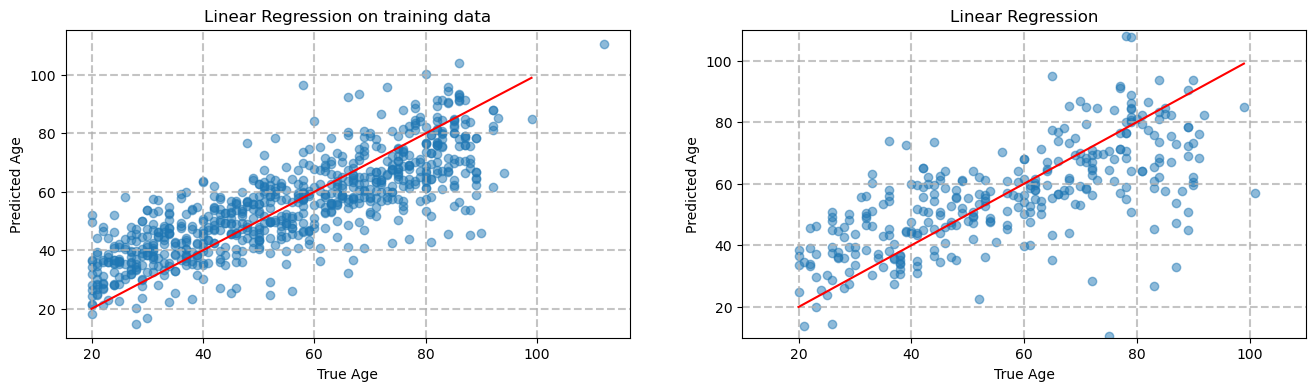

In [90]:
plt.rcdefaults()
mod_100, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, y_train, X_test, y_test, plot=True)